In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")#ただの背景の設定：https://qiita.com/eriksoon/items/b93030ba4dc686ecfbba

In [24]:
# Setup　
x_ = np.linspace(-20,20,10000)#線形に等間隔な数列を生成するst,stop,要素数：https://deepage.net/features/numpy-linspace.html
#gridと同様点が線に見えるやつ。
T = 8
armonics = 10#これ何？

In [25]:
def squareWave(x):
    global T#　関数から外に出しても「Tは関数内の定義」だよ！という宣言。しないとこの関数を使っても8になっちゃう：http://uxmilk.jp/12505
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):#[-t/2 to 0]なら-1
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):#[0 to t/2]なら1　#elif：https://www.pythonweb.jp/tutorial/if/index8.html
            return one
        else:
            lowerBoundLeft -= T/2 # a -= b は代入演算子 :a = a - b に同じ #http://www.tohoho-web.com/python/operators.html
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

In [26]:
# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

In [27]:
# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

In [28]:
# Fourier Series function：ここでさっきのbn,wnを使う
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums

In [29]:
y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))

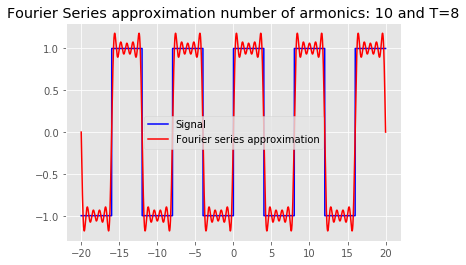

In [30]:
plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics)+" and T="+str(T))
plt.legend()
plt.show()
#gridと同様点が線に見えるやつ。

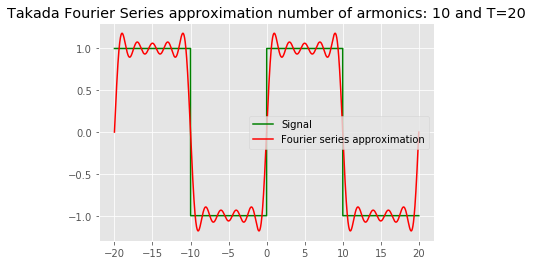

In [31]:
T = 20#周期を増やしてみた
armonics = 10 #これ何？
y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))
plt.plot(x_,y,color="green",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Takada Fourier Series approximation number of armonics: "+str(armonics)+" and T="+str(T))
plt.legend()
plt.show()

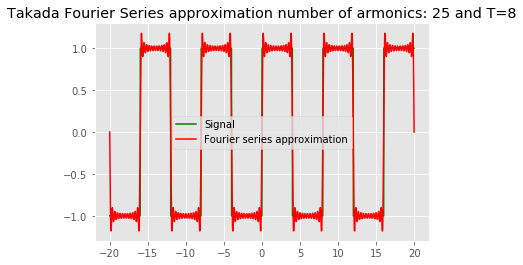

In [32]:
T = 8
armonics = 25 #これ何？→どうやら波々の度合い
y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))
plt.plot(x_,y,color="green",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Takada Fourier Series approximation number of armonics: "+str(armonics)+" and T="+str(T))
plt.legend()
plt.show()